In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    LassoCV,
)
from sklearn.metrics import mean_squared_error

In [3]:
N_OBS = 100

In [4]:
x_1 = np.random.uniform(0, 10, N_OBS)
e = np.random.normal(0, 1, N_OBS)
y = 3 + 2 * x_1 + e
g = np.random.normal(0, 1, N_OBS)
x_2 = -100 * x_1 + g
r, _ = pearsonr(x_1, x_2)

In [5]:
X_1 = x_1.reshape(-1, 1)
X_2 = x_2.reshape(-1, 1)
X = np.concatenate((X_1, X_2), axis=1)

In [6]:
ols_1 = LinearRegression().fit(X_1, y)
ols_2 = LinearRegression().fit(X_2, y)
ols = LinearRegression().fit(X, y)
lasso = LassoCV().fit(X, y)

In [7]:
y_hat_ols_1 = ols_1.predict(X_1)
y_hat_ols_2 = ols_2.predict(X_2)
y_hat_ols = ols.fit(X, y).predict(X)

In [8]:
mse_ols_1 = mean_squared_error(y, y_hat_ols_1)
mse_ols_2 = mean_squared_error(y, y_hat_ols_2)
mse_ols = mean_squared_error(y, y_hat_ols)

In [9]:
print(mse_ols_1)
print(mse_ols_2)
print(mse_ols)

0.8998318781503607
0.8917238359780876
0.8366287956975438


In [10]:
coef_ols_1 = ols_1.coef_
coef_ols_2 = ols_2.coef_
coef_ols = ols.coef_
coef_lasso = lasso.coef_

In [11]:
print(coef_ols_1)
print(coef_ols_2)
print(coef_ols)
print(coef_lasso)

[1.96118365]
[-0.01962279]
[-27.60175715  -0.29575669]
[ 0.         -0.01955389]


Text(0.5, 20, 'MSE=0.89983')

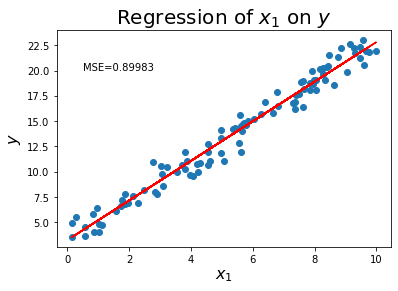

In [12]:
plt.scatter(x_1, y)
plt.plot(x_1, y_hat_ols_1, color="red")
plt.title("Regression of $x_1$ on $y$", fontsize=20)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.text(0.5, 20, f"MSE={mse_ols_1:.5f}")

Text(-300, 20, 'MSE=0.89172')

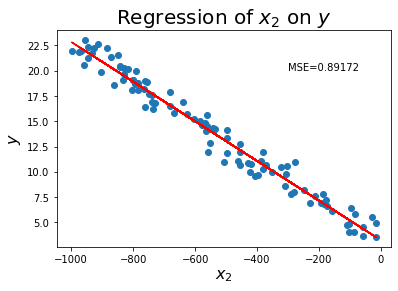

In [13]:
plt.scatter(x_2, y)
plt.plot(x_2, y_hat_ols_2, color="red")
plt.title("Regression of $x_2$ on $y$", fontsize=20)
plt.xlabel("$x_2$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.text(-300, 20, f"MSE={mse_ols_2:.5f}")

Text(6, -200, 'correlation=-1.00000')

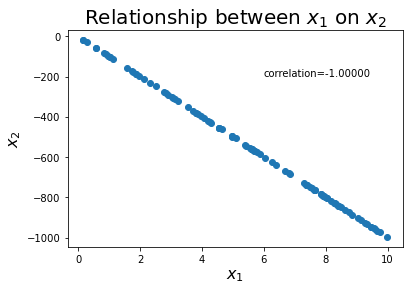

In [14]:
plt.scatter(x_1, x_2)
plt.title("Relationship between $x_1$ on $x_2$", fontsize=20)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.text(6, -200, f"correlation={r:.5f}")